# Genetic Algorigthm

## Problem Statement

The eight queens puzzle is the problem of placing eight chess queens on an 8×8 chessboard so that no two queens threaten 
each other; thus, a solution requires that no two queens share the same row, column, or diagonal. The eight queens puzzle 
is an example of the more general n queens problem of placing n non-attacking queens on an n×n chessboard. (Source : https://en.wikipedia.org/wiki/Eight_queens_puzzle )	

Challenge
The challenge is to generate one right sequence through Genetic Programming. The sequence has to be 8 numbers between 0 to 7. Each number represents the positions the Queens can be placed. Each number refers to the row number in the specific column
[0,	3,	4,	5,	6,	1,	2,	4]

- 0 is the row number in the column 0 where the Queen can be placed
- 3 is the row number in the column 1 where the Queen can be placed


## Solution

### Evolution Steps
<ol>
    <li>Initialization</li>
    <li>Select Parent & Crossover</li>
    <li>Mutate Offspring</li>
    <li>Merge Main Population & Offspring</li>
    <li>Evaluate, Sort & Select</li>
    <li>Go to Step 2, if it is needed</li>
</ol>

### Architecture

![DFD_1.png](https://github.com/amitlohani/Python-Challenge/blob/master/DFD_1.png)

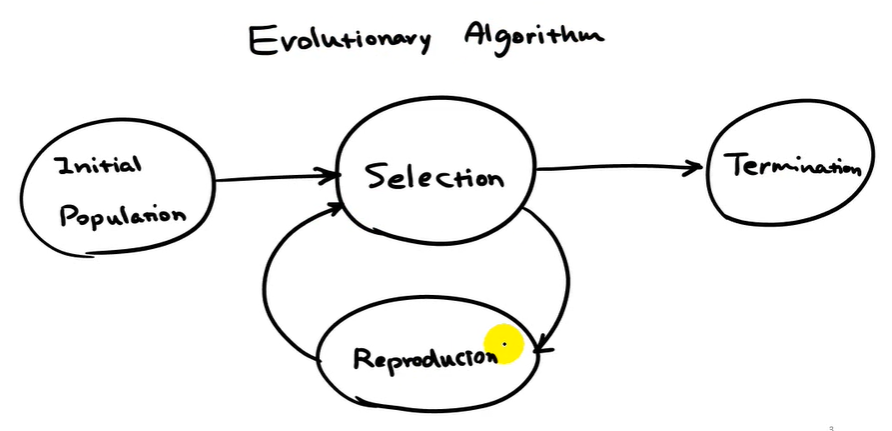

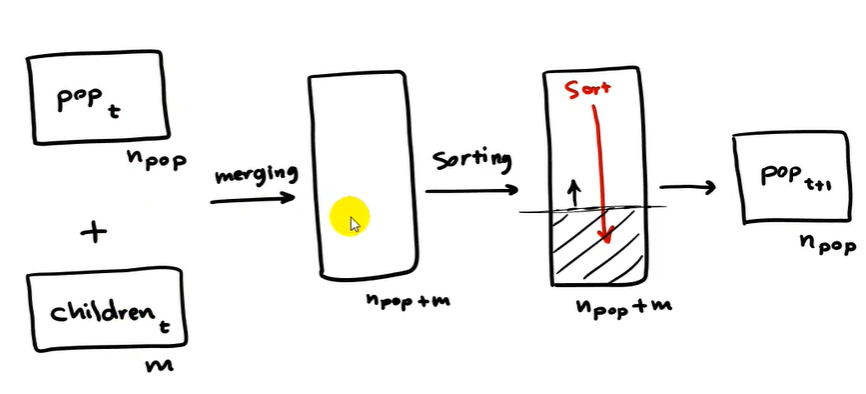

### Python Script

In [2]:
# !/usr/bin/python
# -*- coding: utf-8 -*-
"""
Requirement: The eight queens puzzle is the problem of placing eight chess queens on an 8×8 chessboard so that no two queens 
             threaten each other; thus, a solution requires that no two queens share the same row, column, or diagonal.

Description: This python script will generate one right sequence of 8-queen problem as a part of the Data Science Summit 
             2020 - Week 1 python challenge.  

@authors:    Amit Kumar
version 1.1
"""

import random
from random import shuffle

# Chess board Class
class BoardPosition:
    def __init__(self,n):
        self.board = self.createBoard(n)
        self.size = n

    def createBoard(self,n):
        board = [["X" for i in range(n)] for j in range(n)]
        return board



# Genetic algorithm function definitions
def generate_chromosome(n):
    chrom = list(range(n))
    shuffle(chrom)        
    return chrom

## Unit Test
# _chromosome = generate_chromosome(8)
# print('CHROMOSOME: ', _chromosome)



def generate_population(n, popSize=50):
    pop = []
    for i in range(popSize):
        chromosome = generate_chromosome(n) 
        while chromosome in pop:
            shuffle(chromosome)
        pop.append(chromosome)
    return pop

## Unit Test
# _population = generate_population(8, 40)
# print('POPULATION: ', _population)



def chromosome_fitness(chromosome):
    h_collisions = sum([chromosome.count(queen)-1 for queen in chromosome])/2
    d_collisions = 0

    n = len(chromosome)
    l_diagonal = [0] * 2*n
    r_diagonal = [0] * 2*n
    for i in range(n):
        l_diagonal[i + chromosome[i] - 1] += 1
        r_diagonal[len(chromosome) - i + chromosome[i] - 2] += 1

    d_collisions = 0
    for i in range(2*n-1):
        counter = 0
        if l_diagonal[i] > 1:
            counter += l_diagonal[i]-1
        if r_diagonal[i] > 1:
            counter += r_diagonal[i]-1
        d_collisions += counter / (n-abs(i-n+1))
    
    return int(maxFitness - (h_collisions + d_collisions))

## Unit Test
# _fitness = chromosome_fitness([6, 2, 4, 3, 7, 1, 5, 0])
# print('FITNESS: ', _fitness)



def probability(chromosome, fitness):
    return fitness(chromosome) / maxFitness

## Unit Test
# _probability = ([6, 2, 4, 3, 7, 1, 5, 0], 27)
# print('PROBABILITY: ', _probability)



def get_parent(population, probabilities):
    populationWithProbabilty = zip(population, probabilities)
    total = sum(w for c, w in populationWithProbabilty)
    r = random.uniform(0, total)
    upto = 0
    for c, w in zip(population, probabilities):
        if upto + w >= r:
            return c
        upto += w
    assert False, "Shouldn't get here"

## Unit Test
# _x = get_parent(
#    [[6, 3, 7, 2, 5, 0, 1, 4], [2, 7, 3, 0, 5, 4, 6, 1], [1, 7, 6, 2, 5, 0, 4, 3], [2, 7, 5, 6, 3, 1, 4, 0]
#     , [0, 4, 6, 5, 7, 2, 1, 3], [6, 2, 0, 7, 5, 4, 3, 1], [7, 1, 4, 6, 2, 0, 5, 3], [2, 3, 6, 7, 0, 5, 4, 1]
#     , [0, 1, 2, 4, 7, 3, 5, 6], [7, 4, 2, 0, 5, 6, 1, 3], [7, 6, 0, 5, 4, 1, 3, 2], [3, 0, 7, 2, 6, 1, 5, 4]
#     , [3, 7, 2, 4, 0, 1, 6, 5], [2, 5, 1, 7, 6, 4, 3, 0], [3, 4, 0, 1, 5, 6, 2, 7], [1, 4, 5, 0, 7, 2, 6, 3]
#     , [0, 6, 1, 7, 3, 5, 4, 2], [1, 7, 3, 5, 2, 4, 0, 6], [0, 5, 4, 1, 7, 2, 3, 6], [3, 2, 7, 1, 0, 6, 4, 5]], 
#     [0.9642857142857143, 0.9642857142857143, 0.9642857142857143, 0.9642857142857143, 0.9642857142857143
#     , 0.9642857142857143, 0.9642857142857143, 0.9285714285714286, 0.9642857142857143, 0.9642857142857143
#     , 0.9642857142857143, 0.9642857142857143, 0.9642857142857143, 0.9642857142857143, 0.9642857142857143
#     , 0.9642857142857143, 0.9642857142857143, 0.9642857142857143, 0.9642857142857143, 0.9285714285714286])
# print('BEST1: ', _x)



def reproduce_crossover(x, y):
    n = len(x)
    c = random.randint(1, n - 1)
    offspring = x[0:c] + y[c:n]

    missing_elem = list(set(x) - set(offspring))
    offspring = offspring
    if len(missing_elem) > 0:
        for elem in offspring:
            if offspring.count(elem) > 1:
                tmp = random.choice(missing_elem)
                offspring[offspring.index(elem)] = tmp
                missing_elem.remove(tmp)
    
    return offspring

## Unit Test 
# _reproduce = reproduce_crossover([1, 7, 6, 2, 5, 0, 4, 3], [3, 0, 7, 2, 6, 1, 5, 4])
# print('REPRODUCE: ', _reproduce)



def mutate(x):
    n = len(x)
    c = random.randint(0, n - 1)
    m = random.randint(1, n - 1)
    x[c] = m
    return x

## Unit Test 
# _mutate = mutate([6, 2, 4, 3, 7, 1, 5, 0])
# print('MUTATE: ', _mutate)



def genetic_queen(population, fitness):
    mutation_probability = 0.003
    pop_len = len(population)
    probabilities = [probability(n, fitness) for n in population]
    
    x = get_parent(population, probabilities)
    y = get_parent(population, probabilities)
    child = reproduce_crossover(x, y)

    if random.random() < mutation_probability:
            child = mutate(child)
            
    population.append(child)
    probabilities = [probability(n, fitness) for n in population]

    population, probabilities = (list(l) for l in zip(*sorted(zip(population, probabilities), key=lambda x: x[1], reverse=True)))
    population = population[0: pop_len]

    return population

## Unit Test 
# l = genetic_queen(
#    [[6, 3, 7, 2, 5, 0, 1, 4], [2, 7, 3, 0, 5, 4, 6, 1], [1, 7, 6, 2, 5, 0, 4, 3], [2, 7, 5, 6, 3, 1, 4, 0]
#     , [0, 4, 6, 5, 7, 2, 1, 3], [6, 2, 0, 7, 5, 4, 3, 1], [7, 1, 4, 6, 2, 0, 5, 3], [2, 3, 6, 7, 0, 5, 4, 1]
#     , [0, 1, 2, 4, 7, 3, 5, 6], [7, 4, 2, 0, 5, 6, 1, 3], [7, 6, 0, 5, 4, 1, 3, 2], [3, 0, 7, 2, 6, 1, 5, 4]
#     , [3, 7, 2, 4, 0, 1, 6, 5], [2, 5, 1, 7, 6, 4, 3, 0], [3, 4, 0, 1, 5, 6, 2, 7], [1, 4, 5, 0, 7, 2, 6, 3]
#     , [0, 6, 1, 7, 3, 5, 4, 2], [1, 7, 3, 5, 2, 4, 0, 6], [0, 5, 4, 1, 7, 2, 3, 6], [3, 2, 7, 1, 0, 6, 4, 5]], chromosome_fitness)
# print(l)



def print_chromosome(chromosome):
    print("Chromosome = {},  Fitness = {}"
        .format(str(chromosome), chromosome_fitness(chromosome)))

## Unit Test
# print_chromosome([6, 2, 4, 3, 7, 1, 5, 0])
    


# Main block
if __name__ == "__main__":

    nQueens = 8
    popSize = nQueens * 5
    maxFitness = (nQueens*(nQueens-1))/2
    
    population = generate_population(nQueens, popSize)
    generation = 1

    print("\n")
    print("================== Start of Solution!!! ======================")
    print("\n")

    # Achieve max fitness
    while not maxFitness in [chromosome_fitness(chromosome) for chromosome in population]:
        print("Generation ==> {}".format(generation))
        population = genetic_queen(population, chromosome_fitness)
        print("Maximum Fitness = {}".format(max([chromosome_fitness(n) for n in population])))
        print("")
        generation += 1

    # Valid sequence output with max fitness
    chrom_out = []
    print("Solved ==> Generation {}!".format(generation-1))
    for chrom in population:
        if chromosome_fitness(chrom) == maxFitness:
            chrom_out = chrom
    
    print("")
    print("One of the solution: ") 
    print_chromosome(chrom_out)

    # Chess board object
    board = BoardPosition(nQueens)
    board = board.createBoard(nQueens)
    
    print("\nBoard Position!!!")
    for i in range(nQueens):
        board[chrom_out[i]][i]="Q"

    for row in board:
        print ("  ".join(row))

    print("\n")
    print("================== End of Solution!!! ======================")



================== Start of Solution!!! ======================


Generation ==> 1
Maximum Fitness = 27

Generation ==> 2
Maximum Fitness = 27

Generation ==> 3
Maximum Fitness = 27

Generation ==> 4
Maximum Fitness = 27

Generation ==> 5
Maximum Fitness = 27

Generation ==> 6
Maximum Fitness = 27

Generation ==> 7
Maximum Fitness = 27

Generation ==> 8
Maximum Fitness = 27

Generation ==> 9
Maximum Fitness = 27

Generation ==> 10
Maximum Fitness = 27

Generation ==> 11
Maximum Fitness = 27

Generation ==> 12
Maximum Fitness = 27

Generation ==> 13
Maximum Fitness = 27

Generation ==> 14
Maximum Fitness = 27

Generation ==> 15
Maximum Fitness = 27

Generation ==> 16
Maximum Fitness = 27

Generation ==> 17
Maximum Fitness = 27

Generation ==> 18
Maximum Fitness = 27

Generation ==> 19
Maximum Fitness = 27

Generation ==> 20
Maximum Fitness = 27

Generation ==> 21
Maximum Fitness = 27

Generation ==> 22
Maximum Fitness = 27

Generation ==> 23
Maximum Fitness = 27

Generation ==> 24
Maxi